<a href="https://colab.research.google.com/github/FranziskoB/Clusters/blob/main/R_Clusters_Exemplo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Cluster Exemplo 5
*   Objetivo: categorizar os clientes de uma operadora de cartão de crédito
*   Analisar os grupos de clientes mais e menos leais à marca (por meio do uso)
*   Fonte: https://www.kaggle.com/datasets/aryashah2k/credit-card-customer-data

##Instalando e carregando as bibliotecas

In [ ]:
if(!"kableExtra" %in% installed.packages()){
    install.packages("kableExtra")}
if(!"IRdisplay" %in% installed.packages()){
    install.packages("IRdisplay")}
if(!"htmltools" %in% installed.packages()){
    install.packages("htmltools")}
if(!"plot3D" %in% installed.packages()){
    install.packages("plot3D")}
if(!"plotly" %in% installed.packages()){
    install.packages("plotly")}   
if(!"reshape2" %in% installed.packages()){
    install.packages("reshape2")} 
if(!"cluster" %in% installed.packages()){
    install.packages("cluster")} 
if(!"factoextra" %in% installed.packages()){
    install.packages("factoextra")} 
if(!"ggrepel" %in% installed.packages()){
    install.packages("ggrepel")} 
if(!"ade4" %in% installed.packages()){
    install.packages("ade4")} 
library(reshape2)
library(knitr)
library(kableExtra)
library(IRdisplay)
library(plot3D)
library(plotly)
library(htmltools)
library(cluster)
library(factoextra)
library(ggrepel)
library(ade4)
library(purrr)
library(tidyverse) 

## Importando, vizualizando e tratando os dados

In [67]:
dados_uso <- read.csv(url("https://raw.githubusercontent.com/FranziskoB/Clusters/main/dados/cartao_credito.csv"))

Visualizando os 10 primeiros registros

In [69]:
display_html(HTML(head(dados_uso,n=10) %>%
  kable() %>%
  kable_styling(bootstrap_options = "striped", 
                full_width = FALSE,
                font_size = 10)))

Sl_No,Customer.Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,87073,100000,2,1,1,0
2,38414,50000,3,0,10,9
3,17341,50000,7,1,3,4
4,40496,30000,5,1,1,4
5,47437,100000,6,0,12,3
6,58634,20000,3,0,1,8
7,48370,100000,5,0,11,2
8,37376,15000,3,0,1,1
9,82490,5000,2,0,2,2
10,44770,3000,4,0,1,7


Estatísticas descritivas

In [72]:
summary(dados_uso)

     Sl_No        Customer.Key   Avg_Credit_Limit Total_Credit_Cards
 Min.   :  1.0   Min.   :11265   Min.   :  3000   Min.   : 1.000    
 1st Qu.:165.8   1st Qu.:33825   1st Qu.: 10000   1st Qu.: 3.000    
 Median :330.5   Median :53874   Median : 18000   Median : 5.000    
 Mean   :330.5   Mean   :55141   Mean   : 34574   Mean   : 4.706    
 3rd Qu.:495.2   3rd Qu.:77202   3rd Qu.: 48000   3rd Qu.: 6.000    
 Max.   :660.0   Max.   :99843   Max.   :200000   Max.   :10.000    
 Total_visits_bank Total_visits_online Total_calls_made
 Min.   :0.000     Min.   : 0.000      Min.   : 0.000  
 1st Qu.:1.000     1st Qu.: 1.000      1st Qu.: 1.000  
 Median :2.000     Median : 2.000      Median : 3.000  
 Mean   :2.403     Mean   : 2.606      Mean   : 3.583  
 3rd Qu.:4.000     3rd Qu.: 4.000      3rd Qu.: 5.000  
 Max.   :5.000     Max.   :15.000      Max.   :10.000  

Realizando a padronização dos dados




In [73]:
dados_padronizado <- as.data.frame(scale(dados_uso[,3:7]))

Visualização


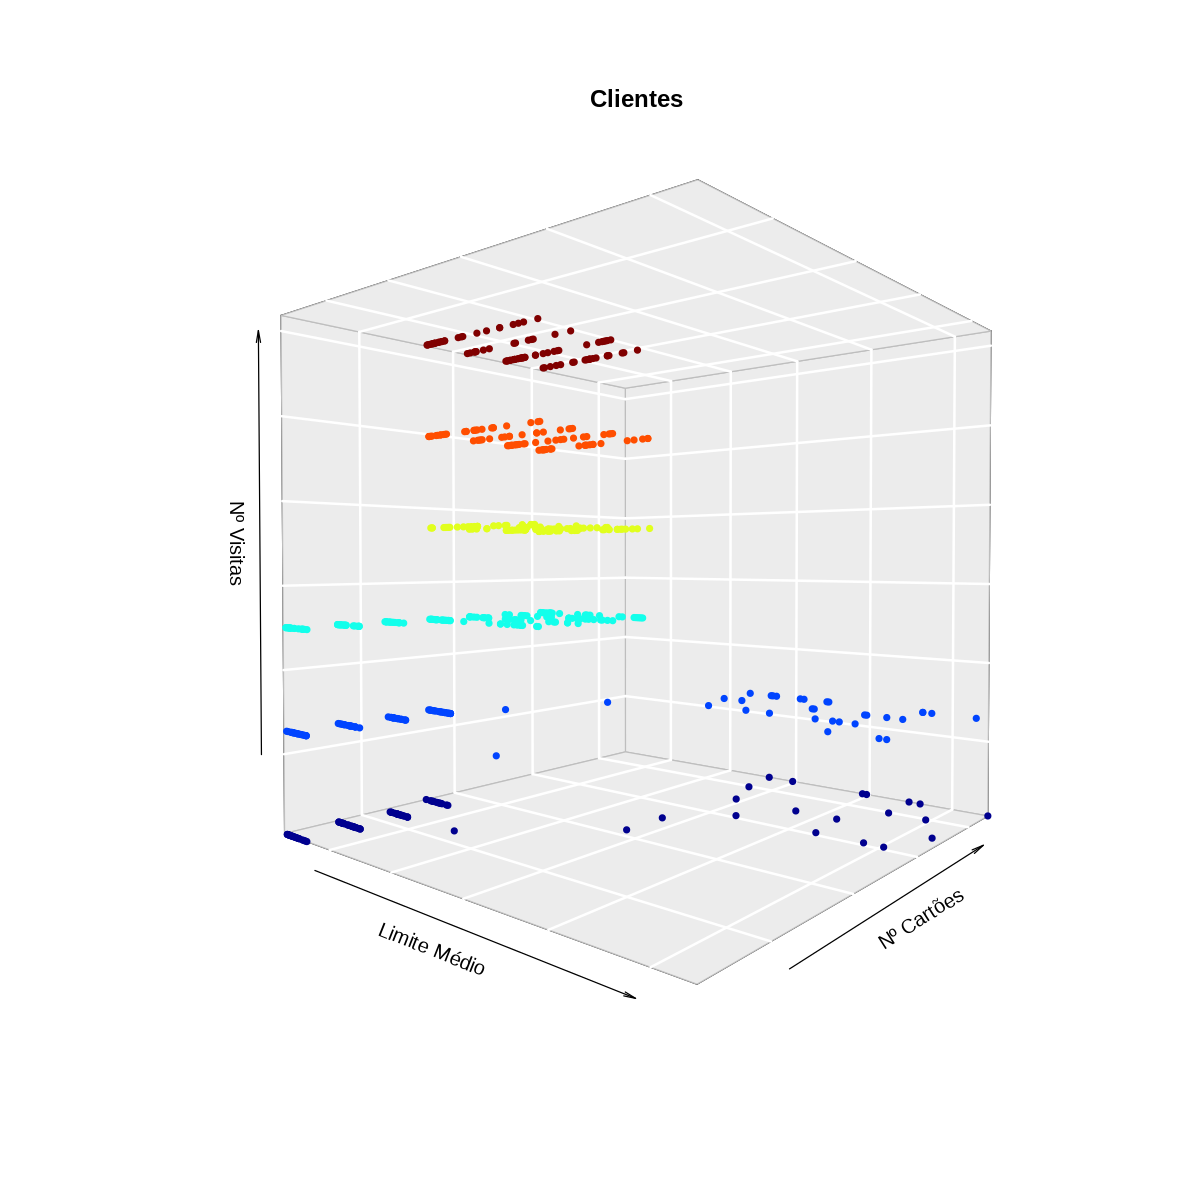

In [75]:
options(repr.plot.width=10, repr.plot.height=10) #Configuração da largura e altura dos plots
scatter3D(x=dados_padronizado$Avg_Credit_Limit,
          y=dados_padronizado$Total_Credit_Cards,
          z=dados_padronizado$Total_visits_bank,
          phi = 1, bty = "g", pch = 20, cex = 1,
          xlab = "Limite Médio",
          ylab = "Nº Cartões",
          zlab = "Nº Visitas",
          main = "Clientes", 
          colkey = F)

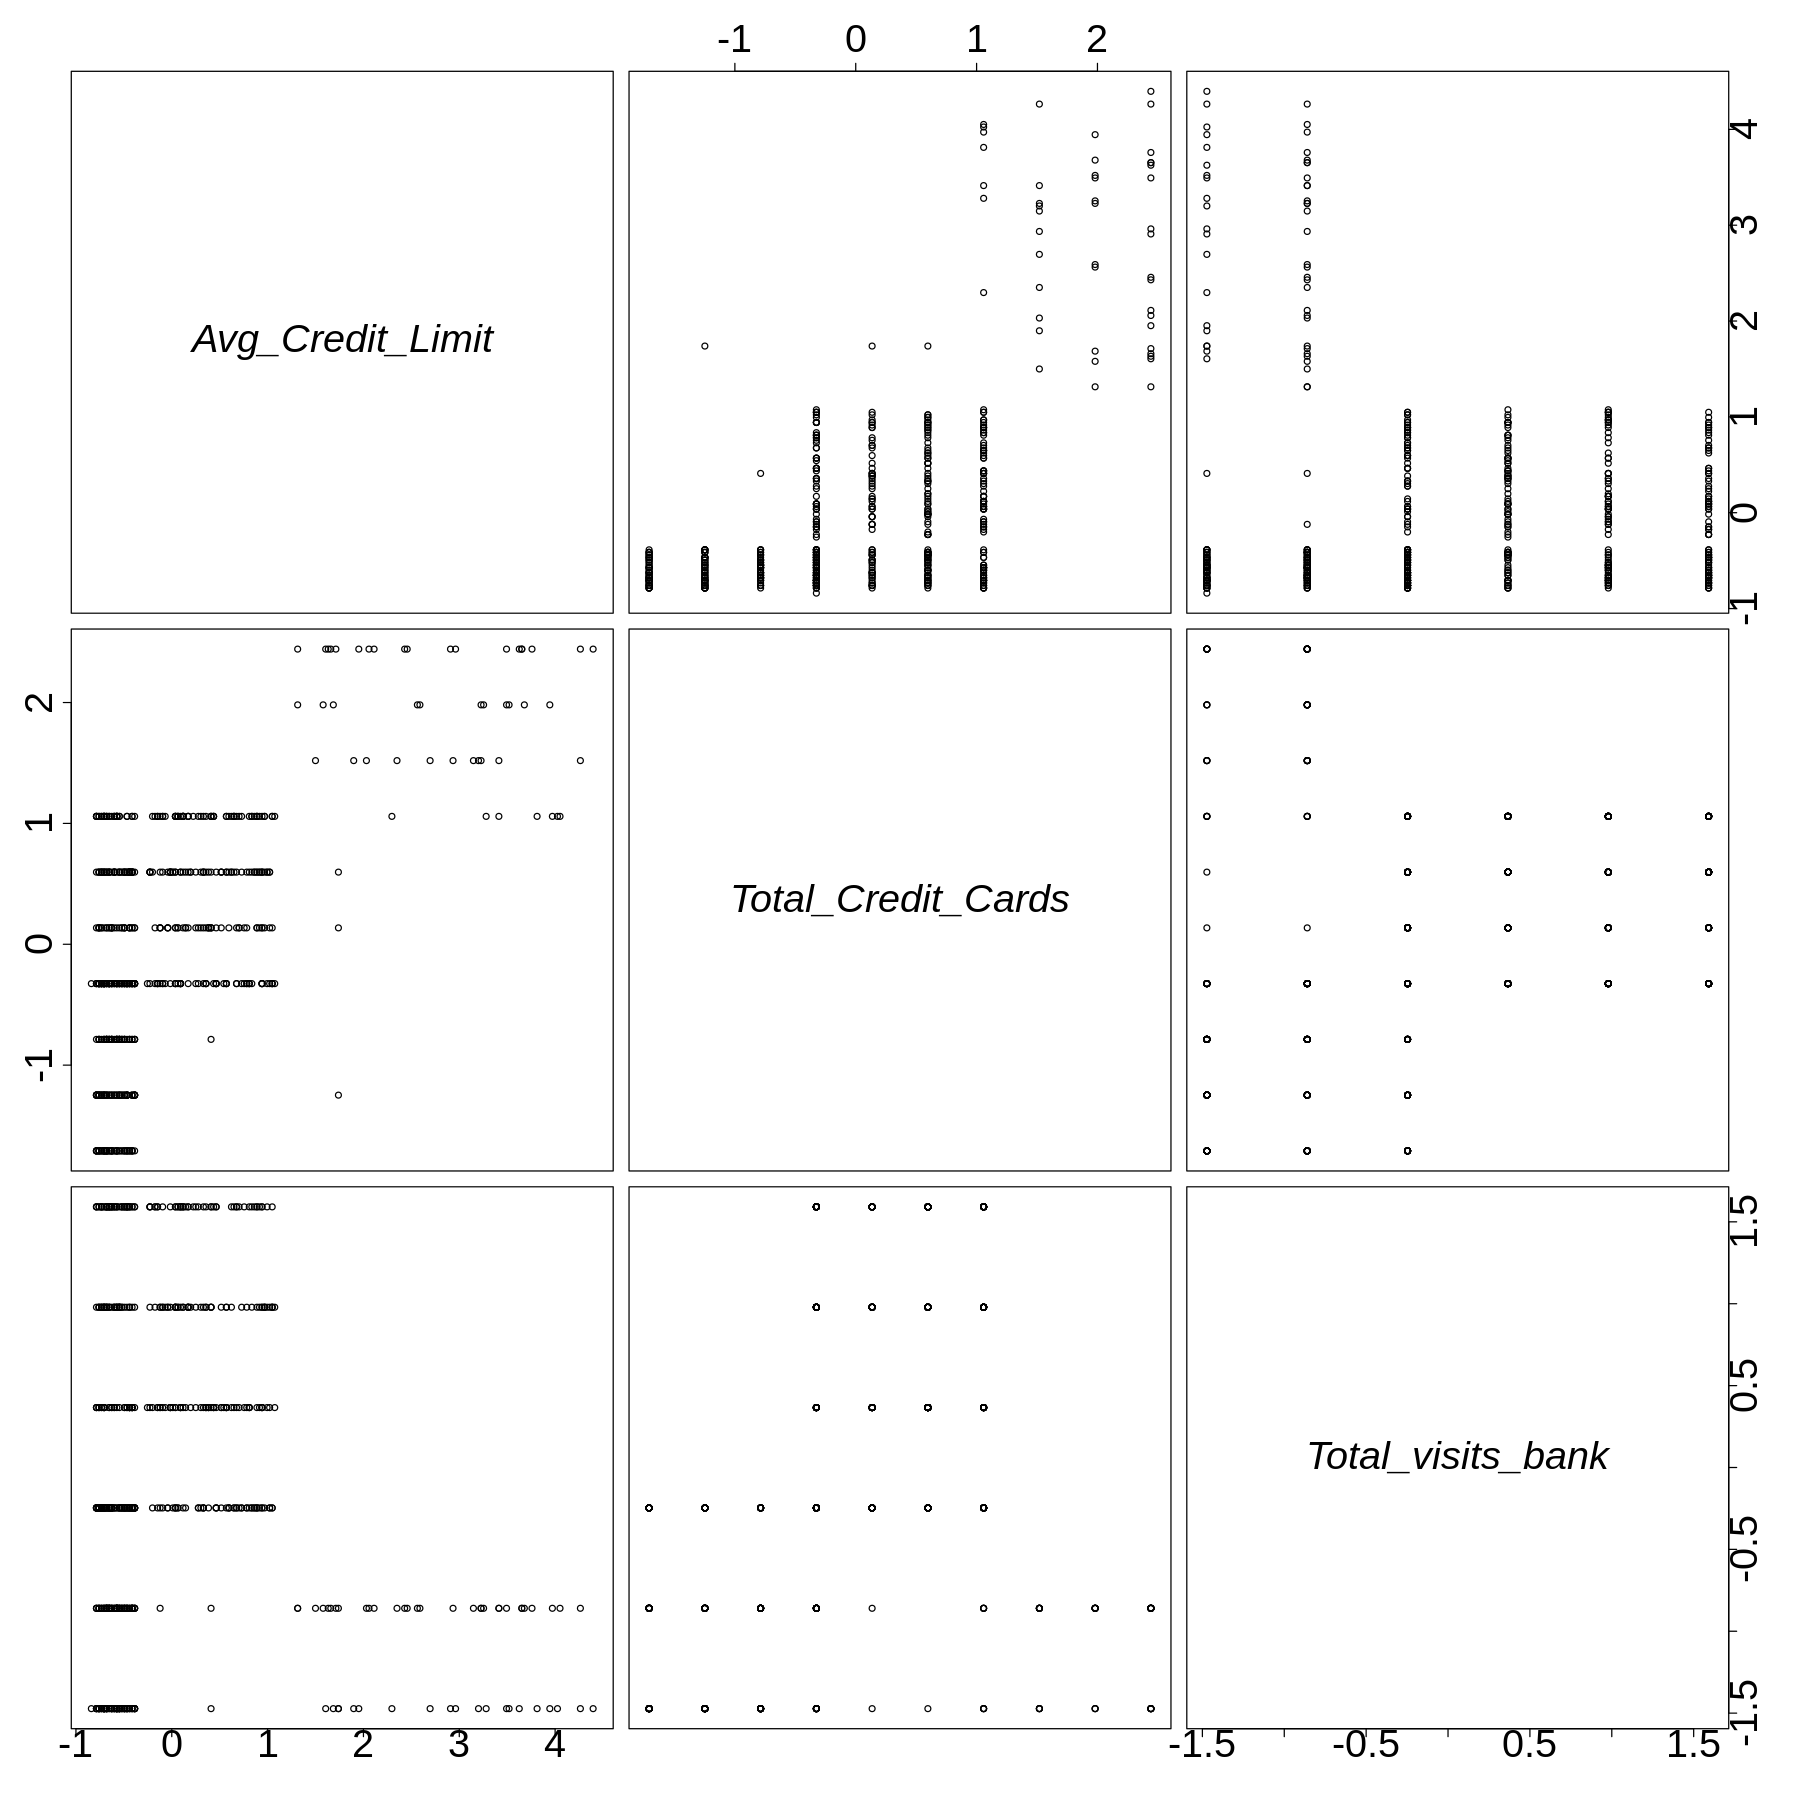

In [99]:
pairs(dados_padronizado[,c("Avg_Credit_Limit",	"Total_Credit_Cards",	"Total_visits_bank")],
      labels = c("Avg_Credit_Limit",	"Total_Credit_Cards",	"Total_visits_bank"), cex.labels = 3, font.labels = 3, cex.axis = 3)


##Esquema de aglomeração não hierárquico K-MEANS

Método de Elbow para identificação do número ótimo de clusters

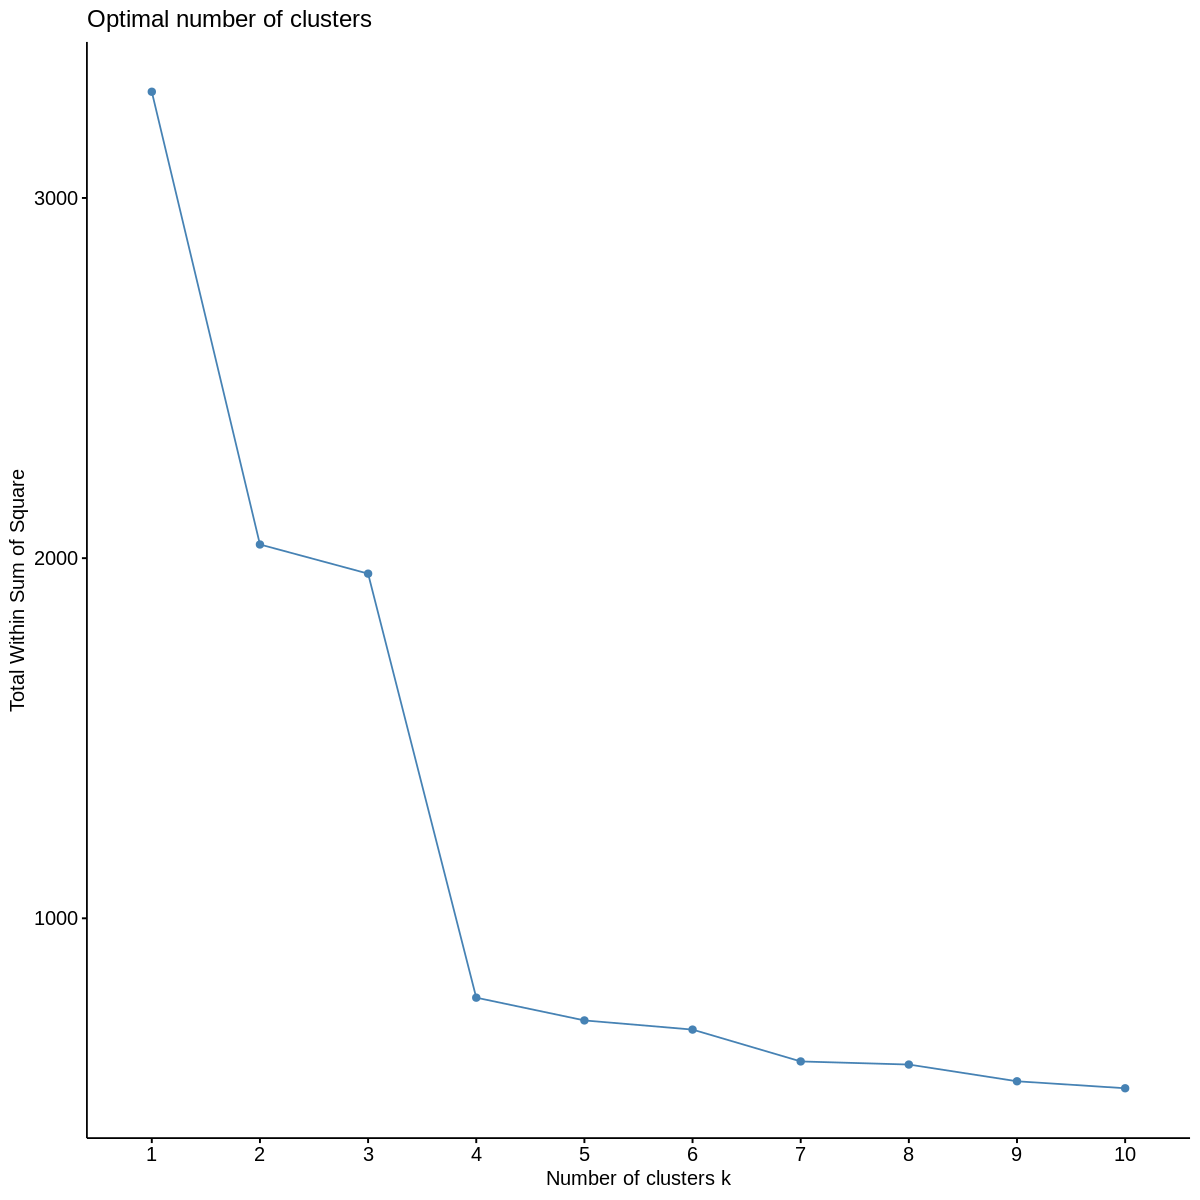

In [76]:
fviz_nbclust(dados_padronizado, kmeans, method = "wss", k.max = 10)

Podemos concluir que 4 clusters é uma opção viável

Elaboração da clusterização não hieráquica k-means

In [78]:
cluster_kmeans <- kmeans(dados_padronizado,
                         centers = 4)

Criando variável categórica para indicação do cluster no banco de dados

In [79]:

dados_padronizado$cluster_K <- factor(cluster_kmeans$cluster)
dados_uso$cluster_K <- factor(cluster_kmeans$cluster)

Analisando por meio de gráficos

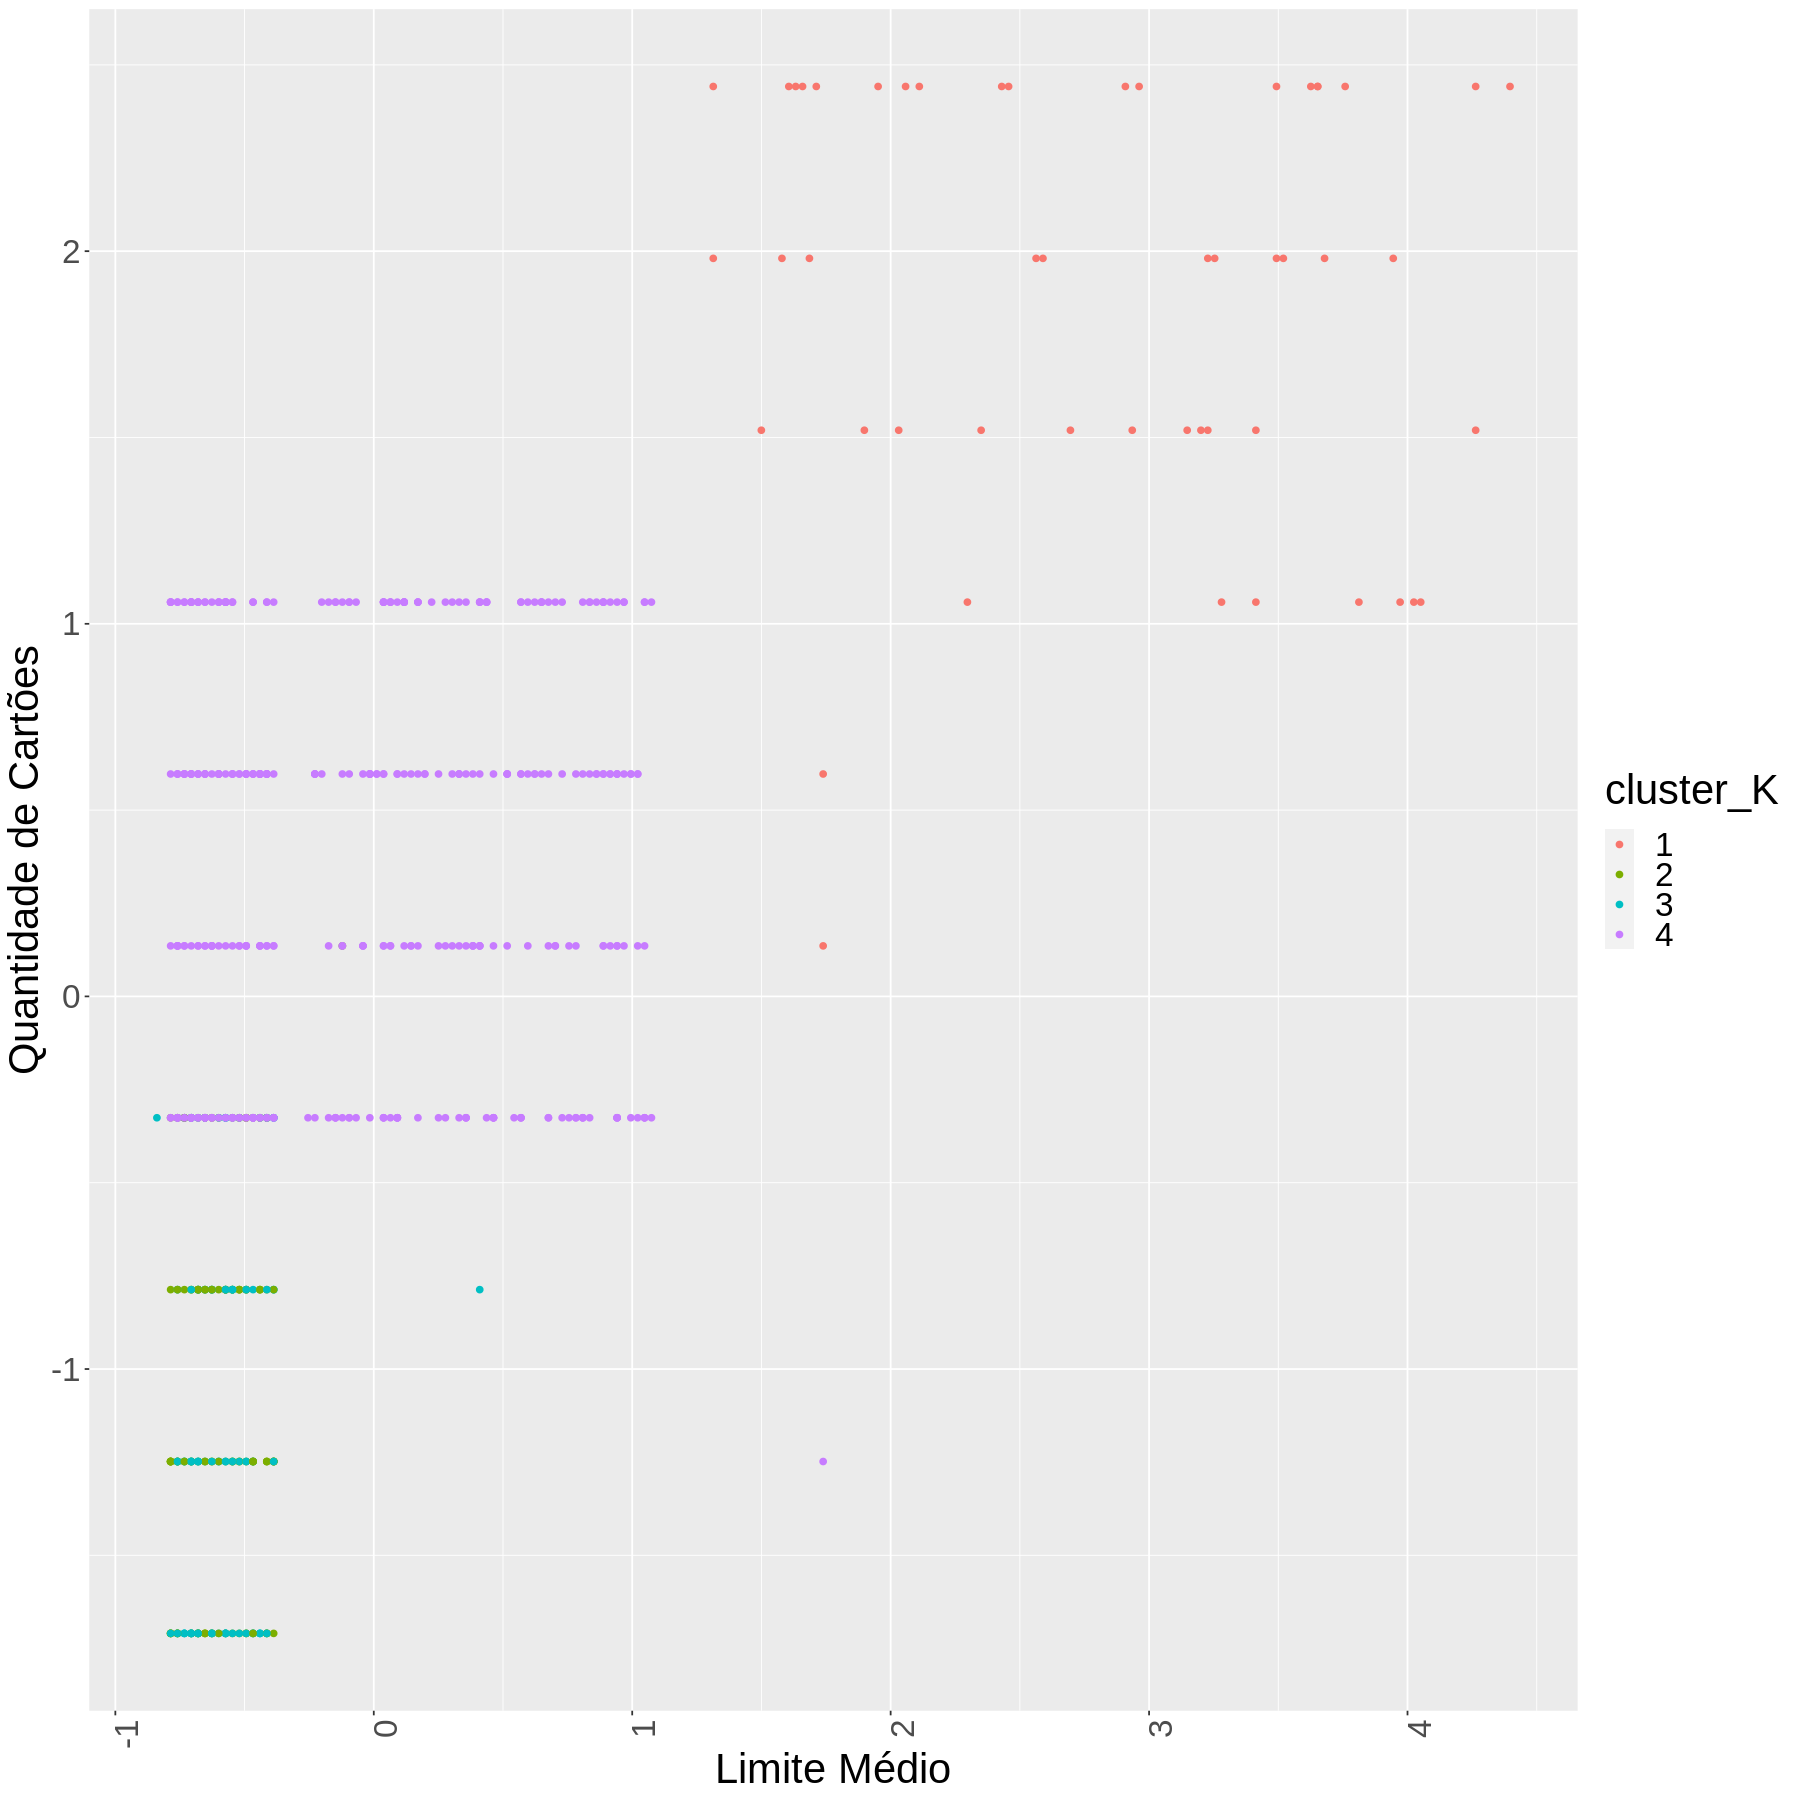

In [105]:
options(repr.plot.width=15, repr.plot.height=15) #Configuração da largura e altura dos plots
ggplot(dados_padronizado) +
  geom_point(aes(x = Avg_Credit_Limit, 
                 y = Total_Credit_Cards, 
                 color = cluster_K)) + 
  theme(text = element_text(size=25),
        axis.text.x = element_text(angle=90, hjust=1)) +
  labs(x = "Limite Médio",
       y = "Quantidade de Cartões")


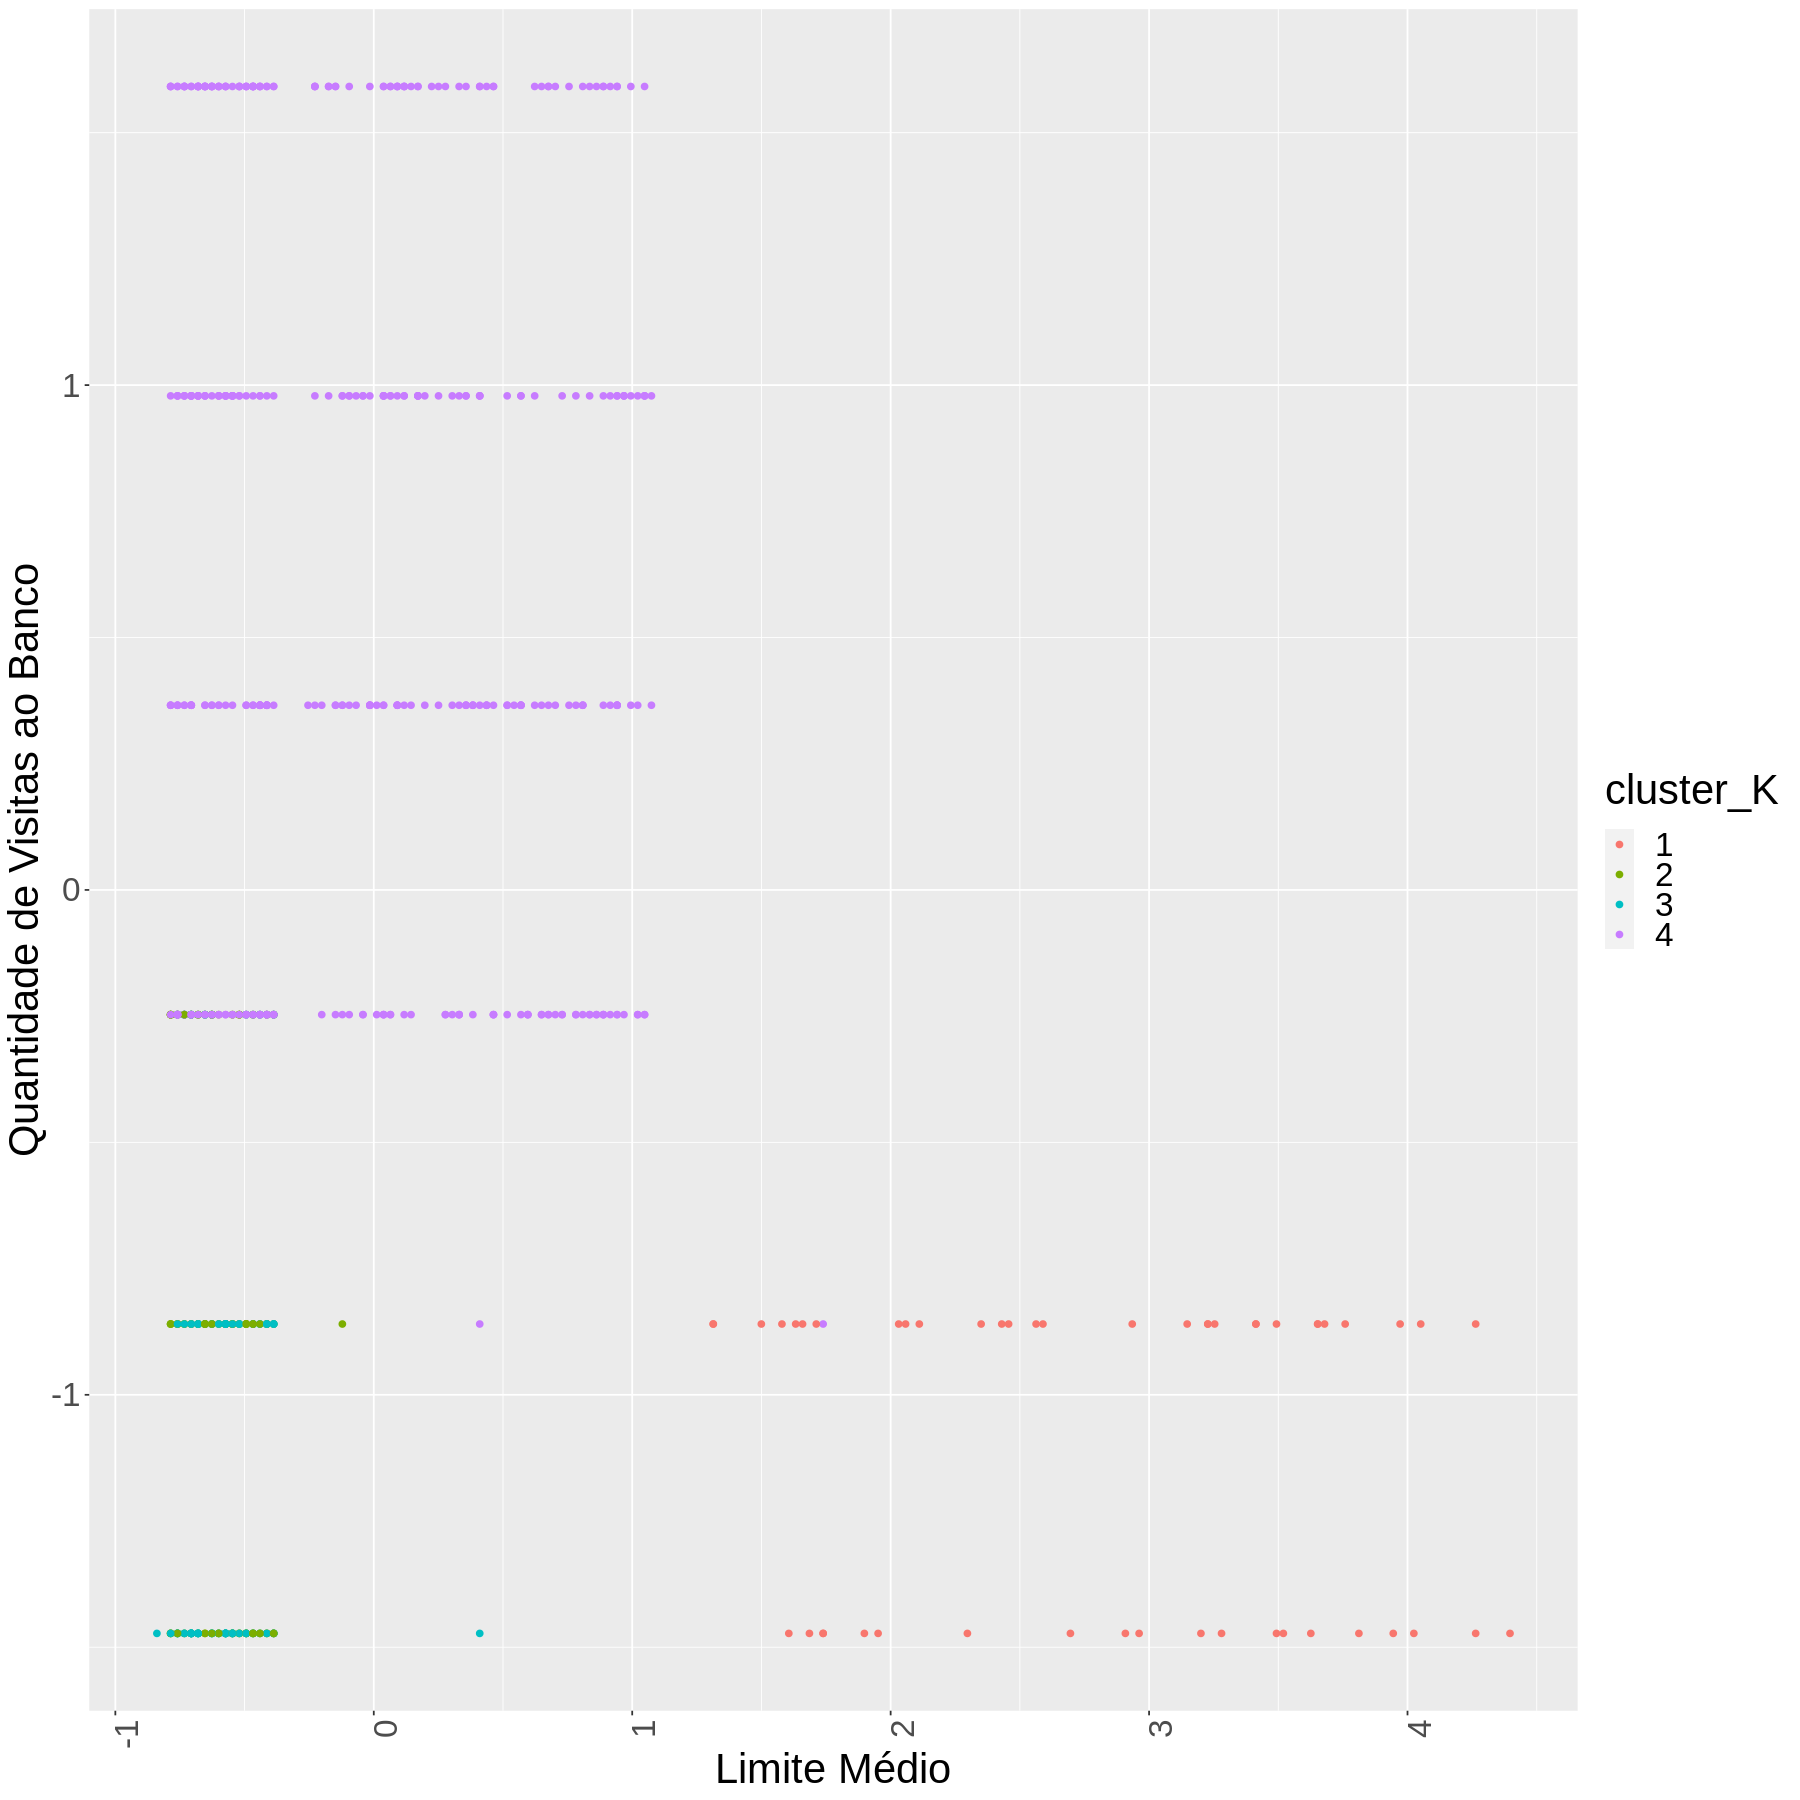

In [106]:
ggplot(dados_padronizado) +
  geom_point(aes(x = Avg_Credit_Limit, 
                 y = Total_visits_bank, 
                 color = cluster_K)) +
  theme(text = element_text(size=25),
  axis.text.x = element_text(angle=90, hjust=1)) + 
  labs(x = "Limite Médio",
       y = "Quantidade de Visitas ao Banco")

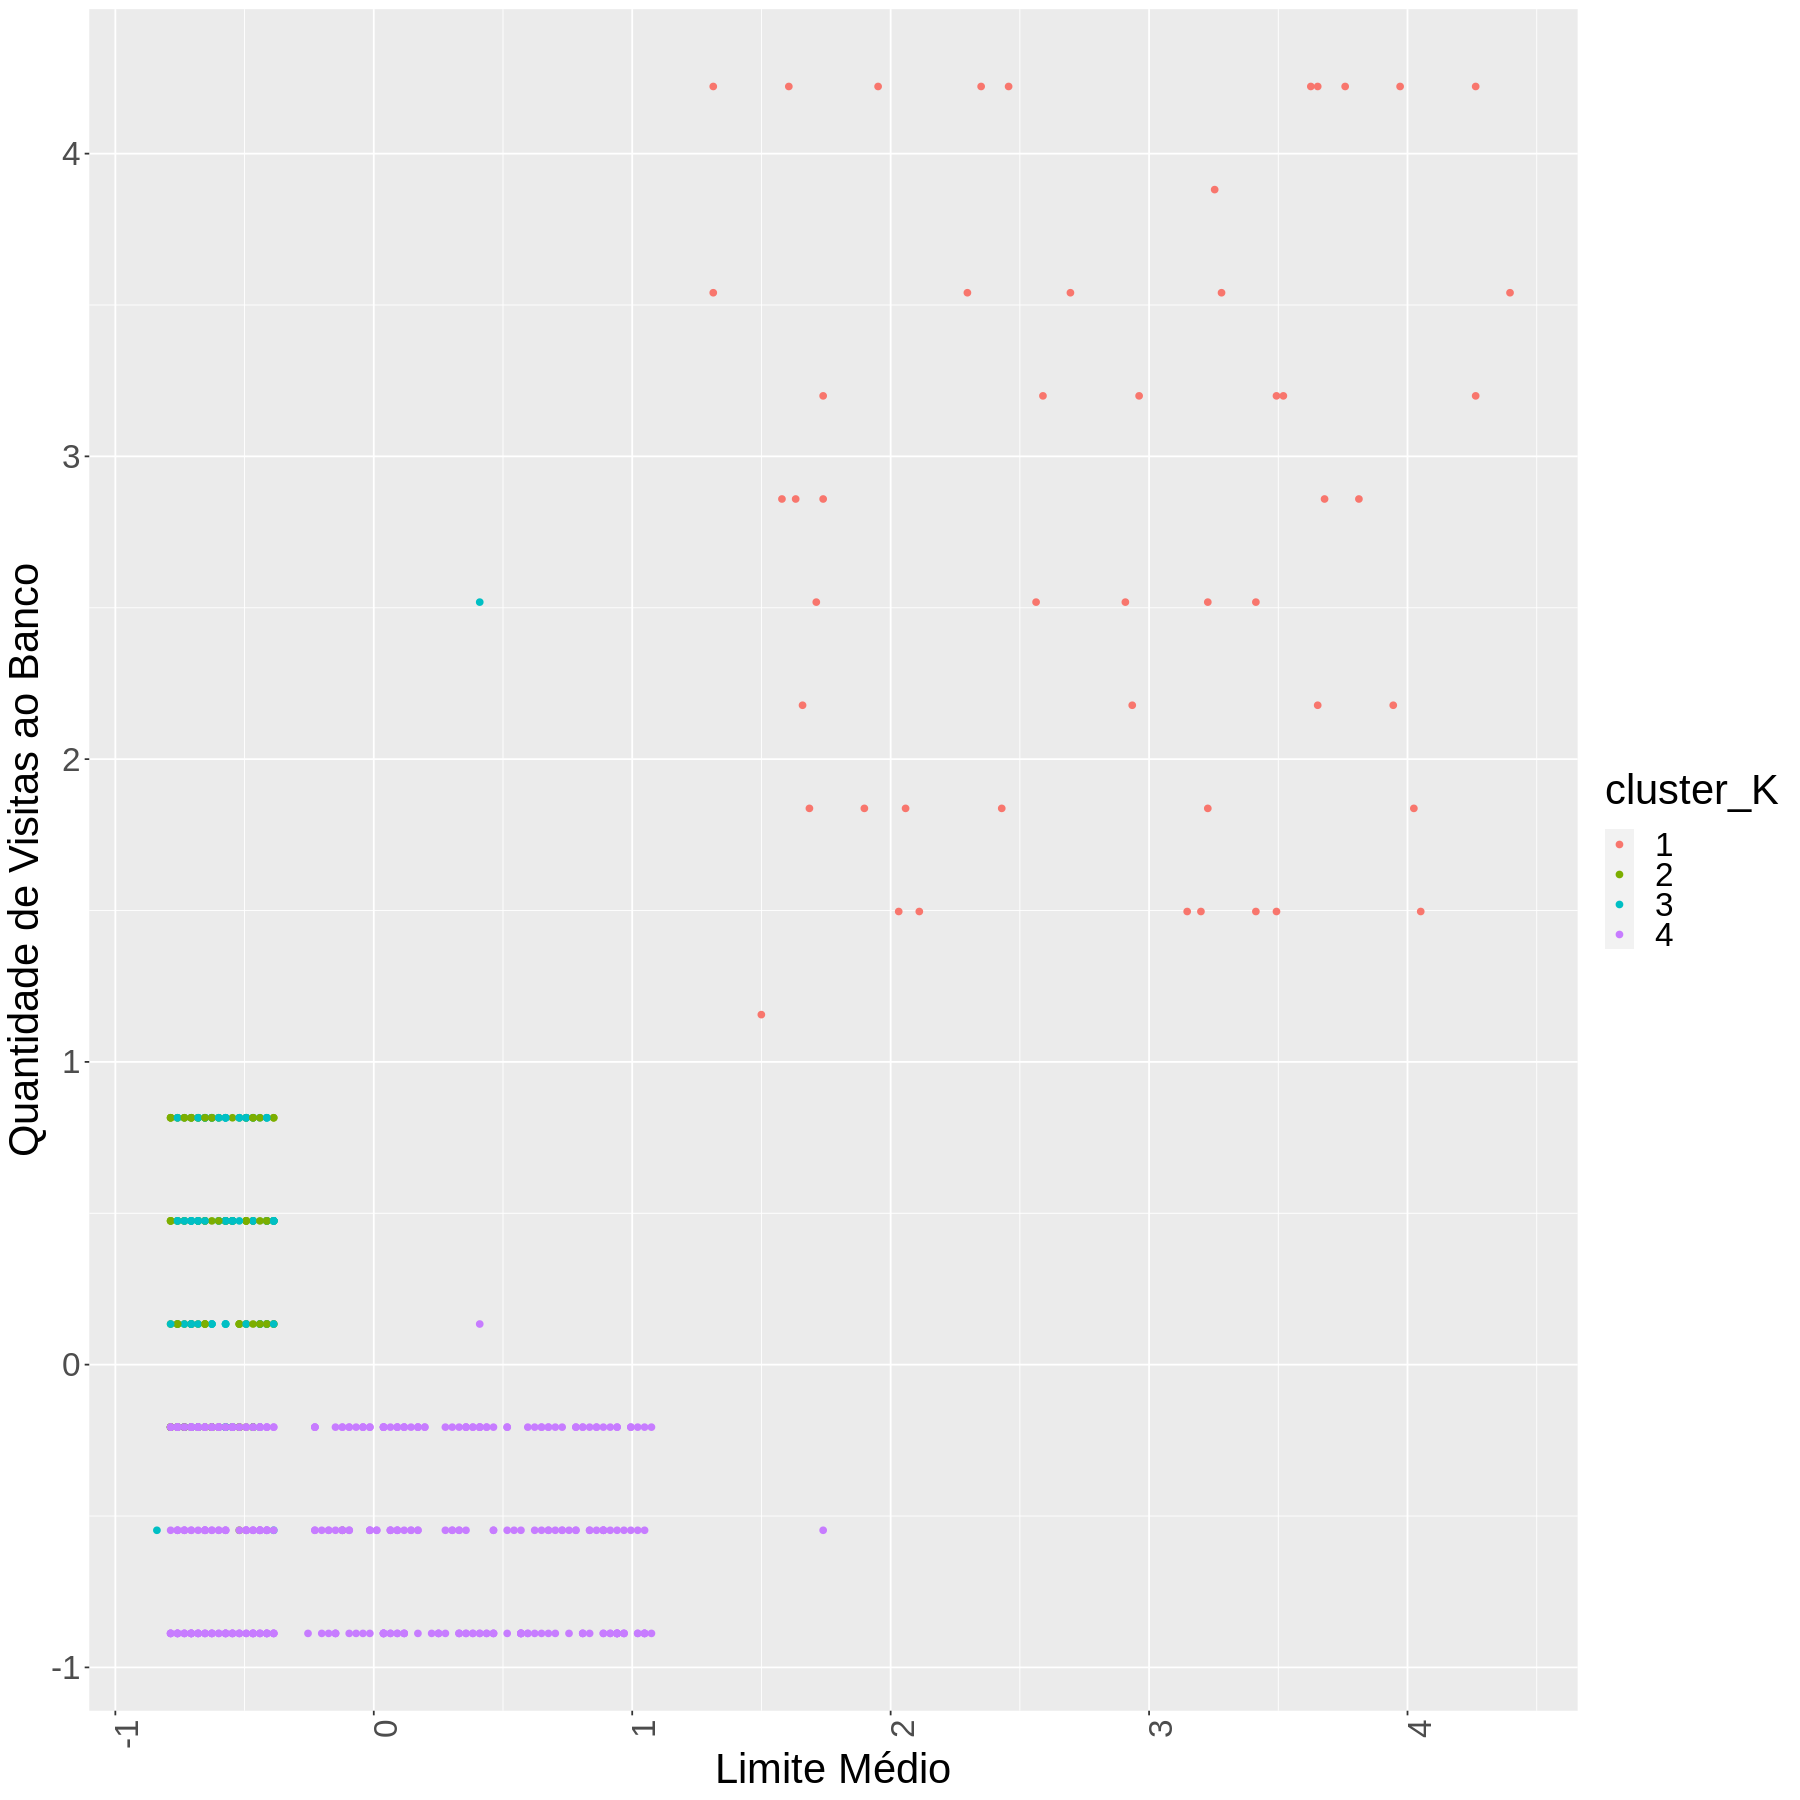

In [107]:
ggplot(dados_padronizado) +
  geom_point(aes(x = Avg_Credit_Limit, 
                 y = Total_visits_online, 
                 color = cluster_K)) + 
    theme(text = element_text(size=25),
    axis.text.x = element_text(angle=90, hjust=1)) +
  labs(x = "Limite Médio",
       y = "Quantidade de Visitas ao Banco")

Analisando por meio de estatísticas descritivas

In [109]:
análise <- group_by(dados_uso, cluster_K) %>%
  summarise(limite = mean(Avg_Credit_Limit, na.rm = TRUE),
            q_cartoes = mean(Total_Credit_Cards, na.rm = TRUE),
            q_vistias = mean(Total_visits_bank, na.rm = TRUE),
            q_online = mean(Total_visits_online, na.rm = TRUE),
            q_liga = mean(Total_calls_made, na.rm = TRUE))
análise      

cluster_K,limite,q_cartoes,q_vistias,q_online,q_liga
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,141040.00,8.740000,0.6000000,10.9000000,1.080000
2,11966.10,2.423729,1.0847458,3.3813559,5.271186
3,12570.09,2.420561,0.7663551,3.7196262,8.607477
4,33792.21,5.516883,3.4961039,0.9818182,1.994805


Anovas

In [114]:

print('Avg_Credit_Limit') 
summary(anova_limite <- aov(formula = Avg_Credit_Limit ~ cluster_K,
                            data = dados_padronizado))
print('Total_Credit_Cards') 
summary(anova_cartoes <- aov(formula = Total_Credit_Cards ~ cluster_K,
                             data = dados_padronizado))
print('Total_visits_bank') 
summary(anova_visitas <- aov(formula = Total_visits_bank ~ cluster_K,
                             data = dados_padronizado))
print('Total_visits_online') 
summary(anova_online <- aov(formula = Total_visits_online ~ cluster_K,
                            data = dados_padronizado))
print('Total_calls_made') 
summary(anova_liga <- aov(formula = Total_calls_made ~ cluster_K,
                          data = dados_padronizado))


[1] "Avg_Credit_Limit"


             Df Sum Sq Mean Sq F value Pr(>F)    
cluster_K     3  479.7  159.90     585 <2e-16 ***
Residuals   656  179.3    0.27                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "Total_Credit_Cards"


             Df Sum Sq Mean Sq F value Pr(>F)    
cluster_K     3  476.7  158.91   571.9 <2e-16 ***
Residuals   656  182.3    0.28                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "Total_visits_bank"


             Df Sum Sq Mean Sq F value Pr(>F)    
cluster_K     3  418.4  139.48   380.4 <2e-16 ***
Residuals   656  240.6    0.37                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "Total_visits_online"


             Df Sum Sq Mean Sq F value Pr(>F)    
cluster_K     3  540.6  180.19     998 <2e-16 ***
Residuals   656  118.4    0.18                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "Total_calls_made"


             Df Sum Sq Mean Sq F value Pr(>F)    
cluster_K     3  526.4   175.5   868.2 <2e-16 ***
Residuals   656  132.6     0.2                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Todas as variáveis são relevantes na criação de pelo menos um cluster